In [25]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [41]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
H:\WPy64-3830\python-3.8.3.amd64\lib\site-packages\keras\backend\tensorflow_backend.py:3201: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if training is 1 or training is True:
H:\WPy64-3830\python-3.8.3.amd64\lib\site-packages\keras\backend\tensorflow_backend.py:3207: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif training is 0 or training is False:
H:\WPy64-3830\python-3.8.3.amd64\lib\site-packages\tensorflow\python\ops\random_ops.py:285: SyntaxWarning: "is" with a literal. Did you mean "=="?
  minval_is_zero = minval is 0  # pylint: disable=literal-comparison
H:\WPy64-3830\python-3.8.3.amd64\lib\site-packages\tensorflow\python\ops\random_ops.py:286: SyntaxWarning: "is" with a literal. Did you mean "=="?
  maxval_is_one = maxval is 1  # pylint: disable=literal-comparison
H:\WPy64-3830\python-3.8.3.amd64\lib\site-packages\tensorflow\python\ops\ragged\ragged_batch_gather_with_default_op.py:84: SyntaxWarning: "is not" with a literal. D

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
file_path = r'H:\Dataset\Janatahack-machine-learning-in-agriculture\data\raw'

In [5]:
#read csv file
df = pd.read_csv(file_path + r'\train_yaOffsB.csv')
print(f'shape of data {len(df)}')

shape of data 88858


<br />

**EDA and Feature Engineering**

In [6]:
df.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [7]:
df.tail(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [8]:
#drop ID column
df.drop(labels = 'ID', axis = 1, inplace = True)

In [9]:
#check for null values
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
#drop null values
df_dropped = df.dropna()

In [11]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


<br />

**Variables have been encoded but close inspection would show variables that were originally numeric**

In [12]:
num_vars = df_dropped[['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']]
cat_vars = df_dropped[['Crop_Type','Pesticide_Use_Category','Season','Crop_Damage','Soil_Type']]

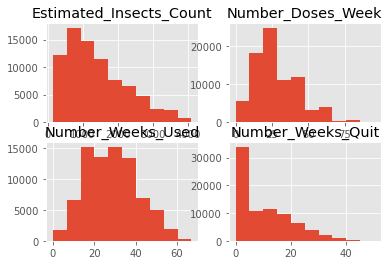

In [13]:
fig, a =  plt.subplots(2,2)

a[0][0].hist(num_vars['Estimated_Insects_Count'])
a[0][0].set_title('Estimated_Insects_Count')

a[0][1].hist(num_vars['Number_Doses_Week'])
a[0][1].set_title('Number_Doses_Week')

a[1][0].hist(num_vars['Number_Weeks_Used'])
a[1][0].set_title('Number_Weeks_Used')

a[1][1].hist(num_vars['Number_Weeks_Quit'])
a[1][1].set_title('Number_Weeks_Quit')

plt.show()

<br />

**Variable transformation using square root**

In [14]:
#create new dataframe and store root of values of num_var database 
num_var_rooted = pd.DataFrame(columns = num_vars.columns)
num_var_rooted = num_vars.apply(np.sqrt)

In [15]:
num_var_rooted.describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,79858.000000,79858.000000,79858.000000,79858.000000
mean,35.675054,4.842727,5.198298,2.418763
std,11.316280,1.548034,1.265578,1.933977
min,12.247449,0.000000,0.000000,0.000000
25%,27.037012,3.872983,4.472136,0.000000
50%,34.813790,4.472136,5.291503,2.645751
75%,43.566042,6.324555,6.082763,4.000000
max,64.007812,9.746794,8.185353,7.071068


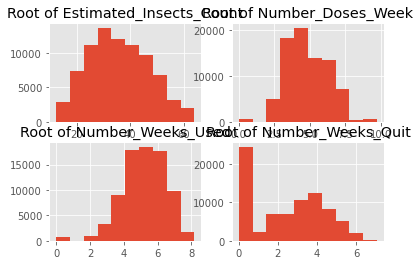

In [16]:
fig, a =  plt.subplots(2,2)

a[0][0].hist(num_var_rooted['Estimated_Insects_Count'])
a[0][0].set_title('Root of Estimated_Insects_Count')

a[0][1].hist(num_var_rooted['Number_Doses_Week'])
a[0][1].set_title('Root of Number_Doses_Week')

a[1][0].hist(num_var_rooted['Number_Weeks_Used'])
a[1][0].set_title('Root of Number_Weeks_Used')

a[1][1].hist(num_var_rooted['Number_Weeks_Quit'])
a[1][1].set_title('Root of Number_Weeks_Quit')

plt.show()

<br />

**Scale variable**

In [17]:
#scale numeric variable to a range of 1 - 3 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,3))
num_var_rooted_scaled = scaler.fit_transform(num_var_rooted)

In [18]:
num_var_rooted_scaled = pd.DataFrame(data = num_var_rooted_scaled, columns = num_var_rooted.columns)

In [19]:
num_var_rooted_scaled.describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,79858.000000,79858.000000,79858.000000,79858.000000
mean,1.905233,1.993707,2.270146,1.684130
std,0.437257,0.317650,0.309230,0.547011
min,1.000000,1.000000,1.000000,1.000000
25%,1.571463,1.794719,2.092717,1.000000
50%,1.871955,1.917663,2.292920,1.748331
75%,2.210138,2.297771,2.486255,2.131371
max,3.000000,3.000000,3.000000,3.000000


In [20]:
#merge numeric and categorical dataframe
new_df = pd.merge(left = num_var_rooted_scaled, right= cat_vars, left_index=True, right_index=True )

In [21]:
new_df.head(5)

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type,Pesticide_Use_Category,Season,Crop_Damage,Soil_Type
0,1.056563,1.0,1.0,1.0,1,1,1,0,0
1,1.085370,1.0,1.0,1.0,1,1,2,1,0
2,1.146203,1.0,1.0,1.0,1,1,2,1,0
3,1.146203,1.0,1.0,1.0,1,1,2,1,1
4,1.241335,1.0,1.0,1.0,1,1,2,1,0


<br />

**Remove Outliers**

In [26]:
##Identify outliers using z-score.
#outliers include all values above the 2 standard deviations 
z = np.abs(stats.zscore(new_df))
new_df_3 = new_df[(z < 3).all(axis=1)]

In [31]:
print('Shape of dataframe after outlier removal : ', {new_df_3.shape})
new_df_3['Crop_Damage'].value_counts()

Shape of dataframe after outlier removal :  {(69224, 9)}


0    59308
1     9916
Name: Crop_Damage, dtype: int64

**NB:**
- Removal of values with a standard deviation of above 2 removes affects the target variable and completely removes one of the responses. 

In [33]:
##Identify outliers using z-score.
#outliers include all values above the 2 standard deviations 
z = np.abs(stats.zscore(new_df))
new_df_4 = new_df[(z < 4).all(axis=1)]

In [34]:
print('Shape of dataframe after outlier removal : ', {new_df_4.shape})
new_df_4['Crop_Damage'].value_counts()

Shape of dataframe after outlier removal :  {(71160, 9)}


0    59373
1     9938
2     1849
Name: Crop_Damage, dtype: int64

**NB:**
- Removal of values with a standard deviation of above 3 however retains all the responses in the target variable

**Train-Test Split**

In [37]:
#split dataframe into x and y variables
x = new_df_4.drop(labels='Crop_Damage', axis = 1)
y = new_df_4['Crop_Damage']

In [65]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 10, stratify = y)

**Resample Data**

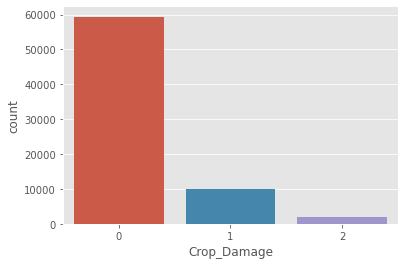

In [39]:
#check classes of target variable
sns.countplot(y)

In [89]:
#resample classes
over = SMOTE(sampling_strategy= 0.5, random_state=10)

## fit and resample dataset
x_sampled, y_sampled= over.fit_resample(x_train, y_train)

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

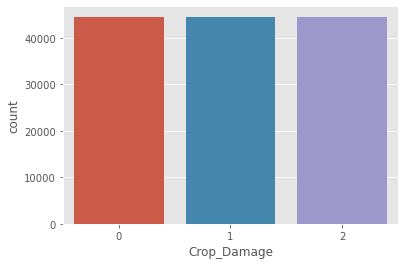

In [82]:
sns.countplot(y_sampled)

**Modeling**

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [85]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [69]:
x_test.shape

(17790, 8)

In [86]:
preds = log_reg.predict(x_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(preds, y_test))

[[14843  2485   462]
 [    0     0     0]
 [    0     0     0]]
